___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [3]:
import pandas as pd

In [4]:
bank_note = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [5]:
bank_note.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

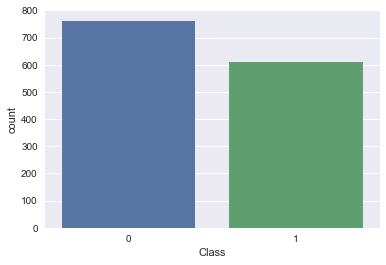

In [8]:
sns.countplot(x = bank_note['Class'])

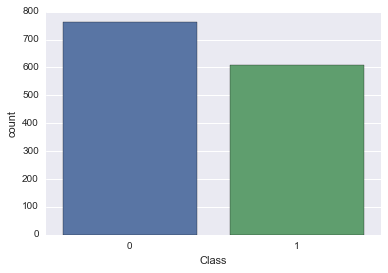

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

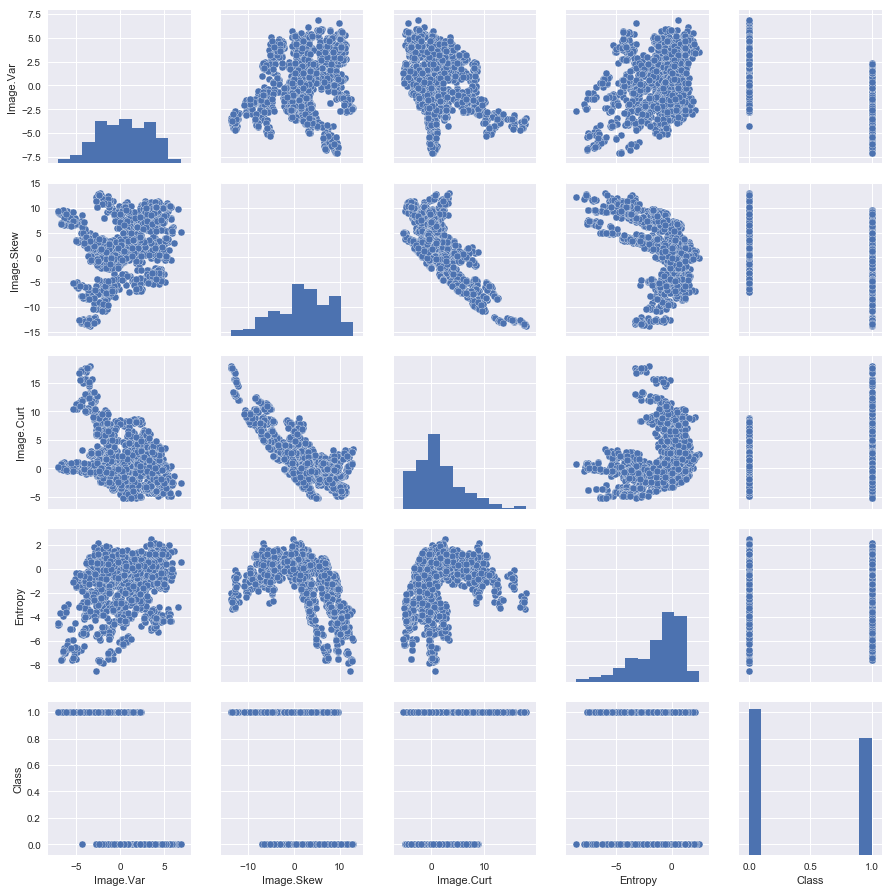

In [9]:
sns.pairplot(bank_note)

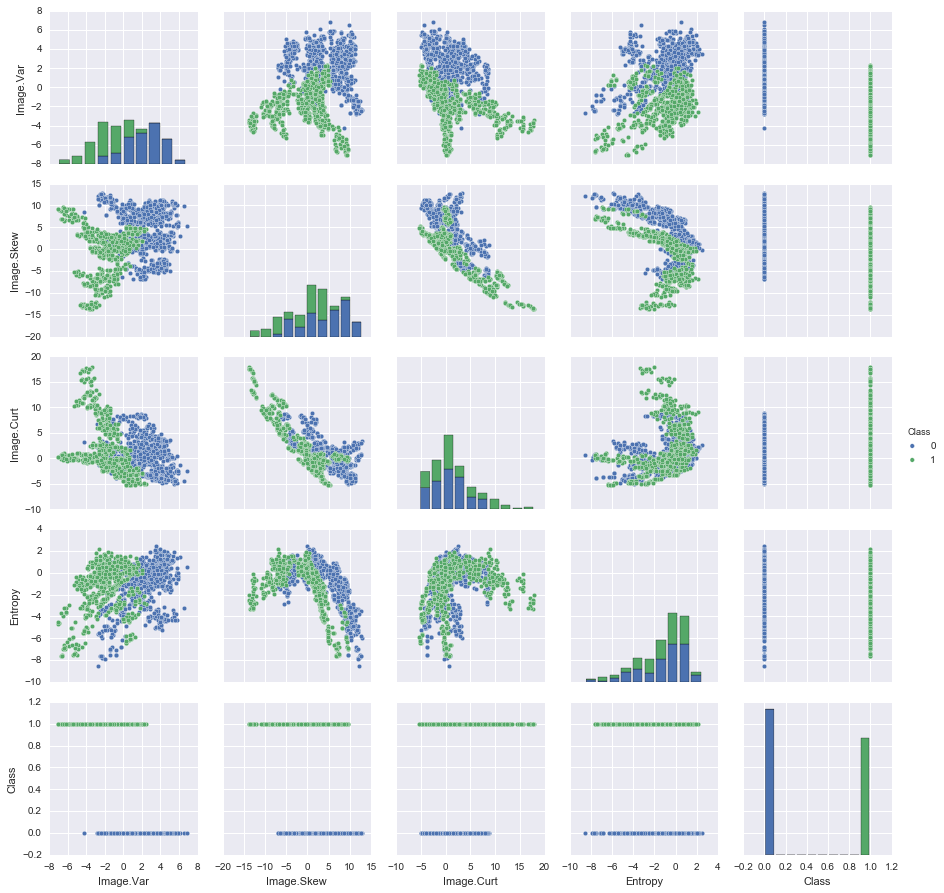

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [10]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [11]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [18]:
data = bank_note.drop('Class', axis = 1)
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [19]:
scaled_data = scaler.transform(data)


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [20]:
df = pd.DataFrame(scaled_data, columns=data.columns)
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = df
y = bank_note['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [36]:
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [38]:
import tensorflow as tf
import tensorflow.contrib.learn as learn

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [58]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = learn.DNNClassifier(feature_columns=feature_columns, hidden_units= [20,10,20,10], n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_tf_random_seed': None, '_task_type': None, '_keep_checkpoint_max': 5, '_is_chief': True, '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026F5BD18A20>, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_master': '', '_save_checkpoints_secs': 600, '_environment': 'local', '_keep_checkpoint_every_n_hours': 10000}


In [59]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\skpatel\Desktop\python\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\skpatel\AppData\Local\Temp\tmp4i5g7d1f\model.ckpt.
INFO:tensorflow:step = 1, loss = 0.732711
INFO:tensorflow:global_step/sec: 221.003
INFO:tensorflow:step = 101, loss = 0.0147243
INFO:tensorflow:Saving checkpoints for 200 into C:\Users\skpatel\AppData\Local\Temp\tmp4i5g7d1f\model.ckpt.
INFO:tensorflow:Loss for final step: 0.00532728.


DNNClassifier(params={'activation_fn': <function relu at 0x0000026F5725F950>, 'hidden_units': [20, 10, 20, 10], 'optimizer': None, 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'input_layer_min_slice_size': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'dropout': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x0000026F5BD18588>})

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

/Users/marci/anaconda/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py:1197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)


DNNClassifier()

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [60]:
note_predictions = list(classifier.predict(X_test))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


C:\Users\skpatel\Desktop\python\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\tensorflow\python\util\deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(y_test,note_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       238
          1       1.00      1.00      1.00       174

avg / total       1.00      1.00      1.00       412



In [57]:
print(confusion_matrix(y_test,note_predictions))

[[232   6]
 [  0 174]]


[[237   0]
 [  1 174]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       237
          1       0.98      0.99      0.99       175

avg / total       0.99      0.99      0.99       412



[[233   4]
 [  1 174]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!